In [1]:
import pandas            as pd
import matplotlib.pyplot as plt
import numpy             as np
import seaborn           as sns
import scipy.stats       as stats
import matplotlib.ticker as ticker

import time
import datetime


import os
import scipy
import math
import warnings

from scipy.stats.stats import pearsonr
from tqdm              import tqdm_notebook as tqdm
from scipy.optimize    import curve_fit

warnings.simplefilter('ignore')

def func_spektr(x, a, A):
    return np.exp(-x/a)*A

In [2]:
PATH = r"C:\Users\user\PycharmProjects\INR\spectrums"

### Графики темпа счета по степеням экспоненты и отношение числа нейтральных частиц к заряженным с полным числом незаряженных частиц

LRB1
0.2480439814814815 темп счета сигналов
21431 всего событий
49.878125189267024 Точка пересечения с осью x
0.36682737037976826 Отношение счета нейтронов к заряженным
--------------------------------
LRB2
0.4927546296296296 темп счета сигналов
42574 всего событий
42.31070313871163 Точка пересечения с осью x
0.7155213839500241 Отношение счета нейтронов к заряженным
--------------------------------
SL6-5
0.1965625 темп счета сигналов
16983 всего событий
62.00465795164981 Точка пересечения с осью x
0.30679702048417135 Отношение счета нейтронов к заряженным
--------------------------------
Составной
0.6961226851851853 темп счета сигналов
60145 всего событий
110.85137587573456 Точка пересечения с осью x
1.0766994274298558 Отношение счета нейтронов к заряженным
--------------------------------


Text(0.5, 1.0, 'Полугарифмический график темпа счета для разных сцинтилляторов от каналов')

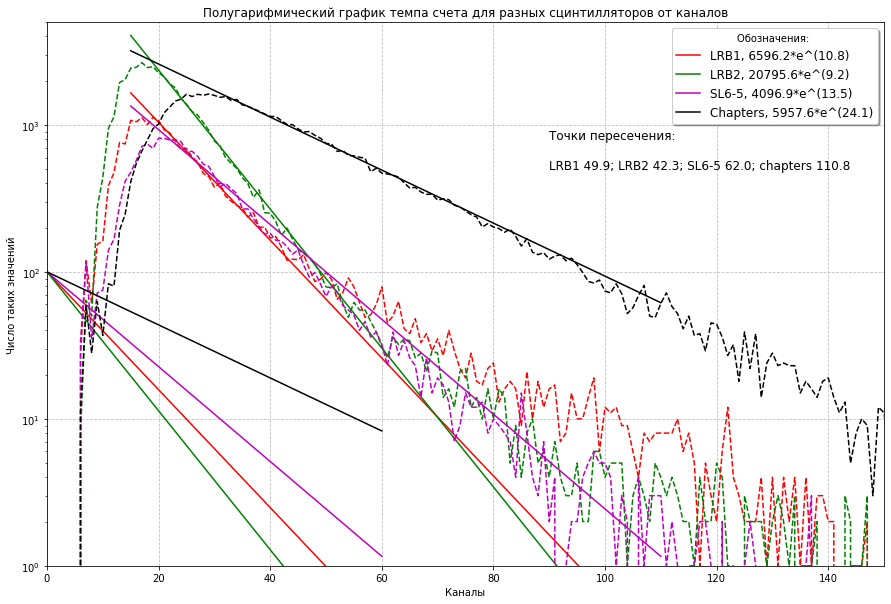

In [4]:
# Общее
names = ['0','1','2','3','4','5','6','7']
x = np.linspace(15,110,num=200)
x1 = np.linspace(0,60,num=200)
plt.figure(figsize = (15,10))
plt.grid(True, linestyle='--', color='0.75')


#LRB1 
    # Данные
Itog = pd.read_csv(PATH+"\lrb1\mspD3_14_lrb1_24h.18", delim_whitespace = True, names = names, nrows = 200)
ydata = Itog[(Itog.index>19) & (Itog.index<41)]['0'].values
xdata = np.linspace(20,40,21)
a = sum(Itog['2'][0:50])
b = sum(Itog['2'][50:100])
popt, pcov = curve_fit(func_spektr, xdata, ydata, p0 = [9,10000])
    #Построение данных
plt.plot(Itog['0'], 'r--', label = '')
plt.plot(x, func_spektr(x, *popt), 'r-', label='LRB1, %s*e^(%s)' %(round(popt[1],1), round(popt[0],1)) )
plt.plot(x1, func_spektr(x1, *(popt[0],100)), 'r-')
    # Вывод
print ('LRB1')
print( sum(Itog[Itog['0']>1]['0'])/1440/60, 'темп счета сигналов')
print( sum(Itog[Itog['0']>1]['0']), 'всего событий')
print(math.log(100)*popt[0], 'Точка пересечения с осью x')
print(a/b, 'Отношение счета нейтронов к заряженным')
print('--------------------------------')


# LRB2
    # Данные
Itog = pd.read_csv(PATH+"\lrb2\mspD3_14_lrb2_24h.18", delim_whitespace = True, names = names, nrows = 200)
ydata = Itog[(Itog.index>19) & (Itog.index<46)]['0'].values
xdata = np.linspace(20,45,26)
a = sum(Itog['2'][0:50])
b = sum(Itog['2'][50:100])
popt, pcov = curve_fit(func_spektr, xdata, ydata, p0 = [9,10000])
    #Построение данных
plt.plot(Itog['0'], 'g--', label = '')
plt.plot(x, func_spektr(x, *popt), 'g-', label='LRB2, %s*e^(%s)' %(round(popt[1],1), round(popt[0],1)))
plt.plot(x1, func_spektr(x1, *(popt[0],100)), 'g-')
    # Вывод
print ('LRB2')
print( sum(Itog[Itog['0']>1]['0'])/1440/60, 'темп счета сигналов')
print( sum(Itog[Itog['0']>1]['0']), 'всего событий')
print(math.log(100)*popt[0], 'Точка пересечения с осью x')
print(a/b, 'Отношение счета нейтронов к заряженным')
print('--------------------------------')


# SL6-5
    # Данные
Itog = pd.read_csv(PATH+"\SL6-5\mspD3_14-SL6-5-24h.18", delim_whitespace = True, names = names, nrows = 200)
ydata = Itog[(Itog.index>19) & (Itog.index<46)]['0'].values
xdata = np.linspace(20,45,26)
a = sum(Itog['2'][0:50])
b = sum(Itog['2'][50:100])
popt, pcov = curve_fit(func_spektr, xdata, ydata, p0 = [9,10000])
    #Построение данных
plt.plot(Itog['0'], 'm--', label = '')
plt.plot(x, func_spektr(x, *popt), 'm-', label='SL6-5, %s*e^(%s)' %(round(popt[1],1), round(popt[0],1)))
plt.plot(x1, func_spektr(x1, *(popt[0],100)), 'm-')
    # Вывод
print ('SL6-5')
print( sum(Itog[Itog['0']>1]['0'])/1440/60, 'темп счета сигналов')
print( sum(Itog[Itog['0']>1]['0']), 'всего событий')
print(math.log(100)*popt[0], 'Точка пересечения с осью x')
print(a/b, 'Отношение счета нейтронов к заряженным')
print('--------------------------------')


# chapters
    # Данные
Itog = pd.read_csv(PATH+"\chapters\mspchap2.18", delim_whitespace = True, names = names, nrows = 200)
ydata = Itog[(Itog.index>30) & (Itog.index<101)]['0'].values
xdata = np.linspace(31,100,70)
a = sum(Itog['2'][0:50])
b = sum(Itog['2'][50:100])
popt, pcov = curve_fit(func_spektr, xdata, ydata, p0 = [9,10000])
    #Построение данных
plt.plot(Itog['0'], 'k--', label = '')
plt.plot(x, func_spektr(x, *popt), 'k-', label='Chapters, %s*e^(%s)' %(round(popt[1],1), round(popt[0],1)))
plt.plot(x1, func_spektr(x1, *(popt[0],100)), 'k-')
    # Вывод
print ('Составной')
print( sum(Itog[Itog['0']>1]['0'])/1440/60, 'темп счета сигналов')
print( sum(Itog[Itog['0']>1]['0']), 'всего событий')
print(math.log(100)*popt[0], 'Точка пересечения с осью x')
print(a/b, 'Отношение счета нейтронов к заряженным')
print('--------------------------------')

plt.yscale('log')
plt.ylim([1,5000])
plt.xlim([0,150])
plt.legend(loc = 'best', title='Обозначения: ', fontsize = 'large', frameon = True, shadow = True)
plt.text(90,800, 'Точки пересечения:', fontsize = 'large')
plt.text(90,500, 'LRB1 49.9; LRB2 42.3; SL6-5 62.0; chapters 110.8', fontsize = 'large')
plt.xlabel('Каналы')
plt.ylabel('Число таких значений')
plt.title('Полугарифмический график темпа счета для разных сцинтилляторов от каналов')
#plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140])

### Построение разницы между двумя измерениями для составного/ламинированного сцинтиллятора

Составной новый
0.42909722222222224 темп счета сигналов
37074 всего событий
85.73916865602078 Точка пересечения с осью x
0.6725857148018354 Отношение счета нейтронов к заряженным
--------------------------------
Составной старый
0.6832638888888888 темп счета сигналов
59034 всего событий
106.2891258024184 Точка пересечения с осью x
1.0580595738616119 Отношение счета нейтронов к заряженным
--------------------------------


Text(0.5, 1.0, 'Полулогарифмический график зависимости темпа счета')

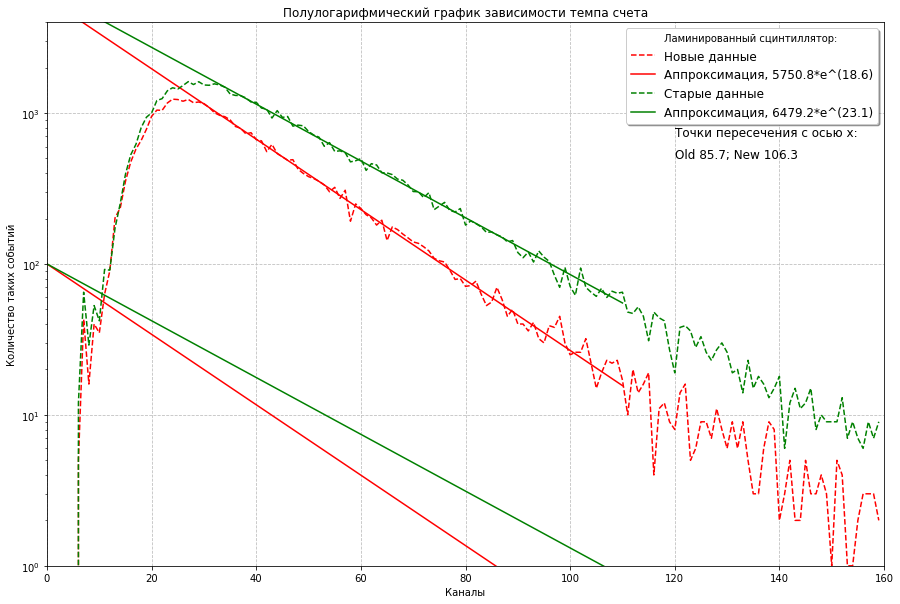

In [5]:
# Составной/в пластике сцинтиллятор новый
    # Общее
plt.figure(figsize = (15,10))
x = np.linspace(0,110,num=200)
plt.grid(True, linestyle='--', color='0.75')
names = ['0','1','2','3','4','5','6','7']

    #Данные новые
Itog = pd.read_csv(PATH+"\chapters_new\msp12-16.18", delim_whitespace = True, names = names, nrows = 160)
ydata = Itog[(Itog.index>35) & (Itog.index<101)]['0'].values
xdata = np.linspace(36,100,65)
a = sum(Itog['2'][0:50])
b = sum(Itog['2'][50:100])
popt, pcov = curve_fit(func_spektr, xdata, ydata, p0 = [9,10000])

    #Построение данных и их вывод
plt.plot(Itog['0'], 'r--', label = 'Новые данные')
plt.plot(x, func_spektr(x, *popt), 'r-', label='Аппроксимация, %s*e^(%s)' %(round(popt[1],1), round(popt[0],1)))
plt.plot(x, func_spektr(x, *(popt[0],100)), 'r-')
print ('Составной новый')
print( sum(Itog[Itog['0']>1]['0'])/1440/60, 'темп счета сигналов')
print( sum(Itog[Itog['0']>1]['0']), 'всего событий')
print(math.log(100)*popt[0], 'Точка пересечения с осью x')
print(a/b, 'Отношение счета нейтронов к заряженным')
print('--------------------------------')

    # Данные старые
Itog = pd.read_csv(PATH+"\chapters\mspchap1.18", delim_whitespace = True, names = names, nrows = 160)
ydata = Itog[(Itog.index>35) & (Itog.index<101)]['0'].values
xdata = np.linspace(36,100,65)
a = sum(Itog['2'][0:50])
b = sum(Itog['2'][50:100])
popt, pcov = curve_fit(func_spektr, xdata, ydata, p0 = [9,10000])

    # Построене данных
plt.plot(Itog['0'], 'g--', label = 'Старые данные')
plt.plot(x, func_spektr(x, *popt), 'g-', label='Аппроксимация, %s*e^(%s)' %(round(popt[1],1), round(popt[0],1)))
plt.plot(x, func_spektr(x, *(popt[0],100)), 'g-')
print ('Составной старый')
print( sum(Itog[Itog['0']>1]['0'])/1440/60, 'темп счета сигналов')
print( sum(Itog[Itog['0']>1]['0']), 'всего событий')
print(math.log(100)*popt[0], 'Точка пересечения с осью x')
print(a/b, 'Отношение счета нейтронов к заряженным')
print('--------------------------------')

    # Построение графиков
plt.yscale('log')
plt.xlabel('Каналы')
plt.ylabel('Количество таких событий')
plt.xlim([0,160])
plt.ylim([1,4000])
plt.legend(title = 'Ламинированный сцинтиллятор: ', loc = 'best', frameon = True, shadow = True, fontsize = 'large')
plt.text(120,700, 'Точки пересечения с осью х:', fontsize = 'large')
plt.text(120,500, 'Old 85.7; New 106.3', fontsize = 'large')
plt.title('Полулогарифмический график зависимости темпа счета')

### Построение разницы между двумя измерениями для ЛРБ2

ЛРБ2 новое измерение
0.4611689814814815 темп счета сигналов
39845 всего событий
43.6210893159542 Точка пересечения с осью x
1.0580595738616119 Отношение счета нейтронов к заряженным
--------------------------------
ЛРБ2 старое измерение
0.4926273148148148 темп счета сигналов
42563 всего событий
42.27931246860589 Точка пересечения с осью x
1.0580595738616119 Отношение счета нейтронов к заряженным
--------------------------------


Text(0.5, 1.0, 'Полулогарифмический график зависимости темпа счета')

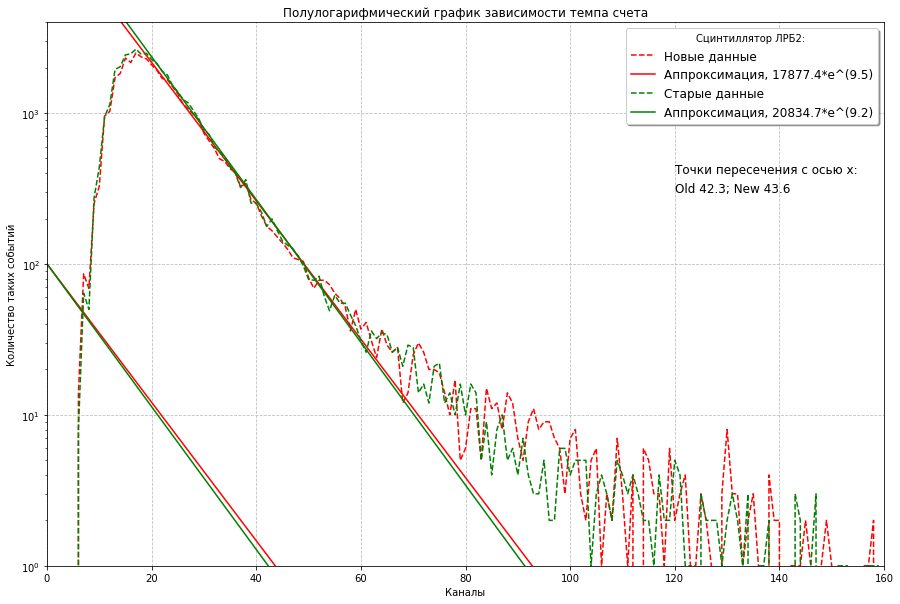

In [6]:
# Составной/в пластике сцинтиллятор новый
    # Общее
plt.figure(figsize = (15,10))
x = np.linspace(0,110,num=200)
plt.grid(True, linestyle='--', color='0.75')
names = ['0','1','2','3','4','5','6','7']

    #Данные новые 
Itog = pd.read_csv(PATH+"\lrb2new\msp12-05.18", delim_whitespace = True, names = names, nrows = 160)
ydata = Itog[(Itog.index>19) & (Itog.index<51)]['0'].values
xdata = np.linspace(20,50,31)
popt, pcov = curve_fit(func_spektr, xdata, ydata, p0 = [9,10000])

    #Построение данных и их вывод
plt.plot(Itog['0'], 'r--', label = 'Новые данные')
plt.plot(x, func_spektr(x, *popt), 'r-', label='Аппроксимация, %s*e^(%s)' %(round(popt[1],1), round(popt[0],1)))
plt.plot(x, func_spektr(x, *(popt[0],100)), 'r-')
print ('ЛРБ2 новое измерение')
print( sum(Itog[Itog['0']>1]['0'])/1440/60, 'темп счета сигналов')
print( sum(Itog[Itog['0']>1]['0']), 'всего событий')
print(math.log(100)*popt[0], 'Точка пересечения с осью x')
print(a/b, 'Отношение счета нейтронов к заряженным')
print('--------------------------------')

    # Данные старые
Itog = pd.read_csv(PATH+"\lrb2\mspD3_14_lrb2_24h.18", delim_whitespace = True, names = names, nrows = 160)
ydata = Itog[(Itog.index>19) & (Itog.index<51)]['0'].values
xdata = np.linspace(20,50,31)
popt, pcov = curve_fit(func_spektr, xdata, ydata, p0 = [9,10000])

    # Построене данных
plt.plot(Itog['0'], 'g--', label = 'Старые данные')
plt.plot(x, func_spektr(x, *popt), 'g-', label='Аппроксимация, %s*e^(%s)' %(round(popt[1],1), round(popt[0],1)))
plt.plot(x, func_spektr(x, *(popt[0],100)), 'g-')
print ('ЛРБ2 старое измерение')
print( sum(Itog[Itog['0']>1]['0'])/1440/60, 'темп счета сигналов')
print( sum(Itog[Itog['0']>1]['0']), 'всего событий')
print(math.log(100)*popt[0], 'Точка пересечения с осью x')
print(a/b, 'Отношение счета нейтронов к заряженным')
print('--------------------------------')

    # Построение графиков
plt.yscale('log')
plt.xlabel('Каналы')
plt.ylabel('Количество таких событий')
plt.xlim([0,160])
plt.ylim([1,4000])
plt.legend(title = 'Сцинтиллятор ЛРБ2: ', loc = 'best', frameon = True, shadow = True, fontsize = 'large')
plt.text(120,400, 'Точки пересечения с осью х:', fontsize = 'large')
plt.text(120,300, 'Old 42.3; New 43.6', fontsize = 'large')
plt.title('Полулогарифмический график зависимости темпа счета')

### Построение разницы между двумя измерениями для SL6-5

Sl6-5 новое измерение
0.23695601851851852 темп счета сигналов
20473 всего событий
51.285594358008474 Точка пересечения с осью x
1.0580595738616119 Отношение счета нейтронов к заряженным
--------------------------------
SL6-5 старое измерение
0.1965625 темп счета сигналов
16983 всего событий
50.43377030181225 Точка пересечения с осью x
1.0580595738616119 Отношение счета нейтронов к заряженным
--------------------------------


Text(0.5, 1.0, 'Полулогарифмический график зависимости темпа счета')

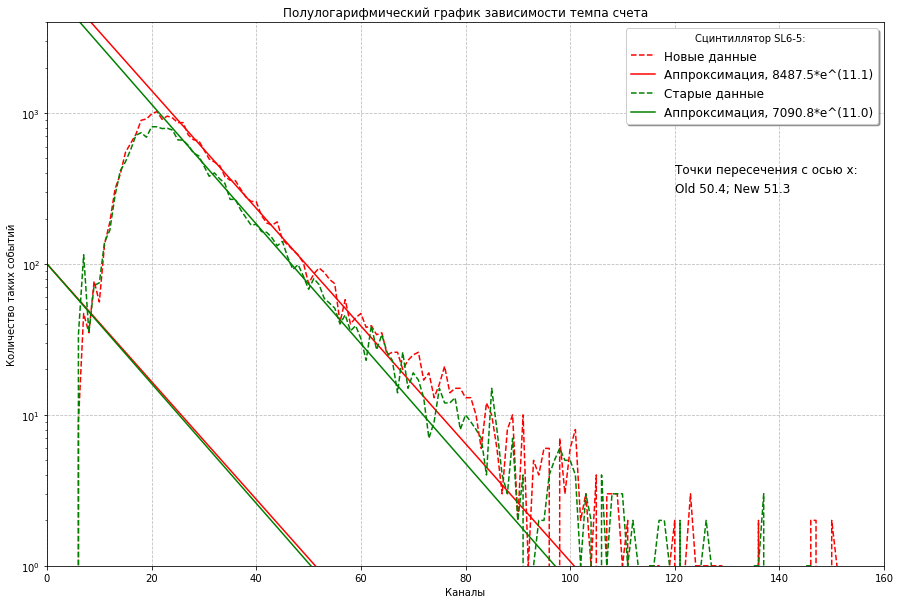

In [7]:
# SL6-5 новый
    # Общее
plt.figure(figsize = (15,10))
x = np.linspace(0,110,num=200)
plt.grid(True, linestyle='--', color='0.75')
names = ['0','1','2','3','4','5','6','7']

    #Данные новые
Itog = pd.read_csv(PATH+"\SL6-5new\msp12-08.18", delim_whitespace = True, names = names, nrows = 160)
ydata = Itog[(Itog.index>25) & (Itog.index<51)]['0'].values
xdata = np.linspace(26,50,25)
popt, pcov = curve_fit(func_spektr, xdata, ydata, p0 = [9,10000])

    #Построение данных и их вывод
plt.plot(Itog['0'], 'r--', label = 'Новые данные')
plt.plot(x, func_spektr(x, *popt), 'r-', label='Аппроксимация, %s*e^(%s)' %(round(popt[1],1), round(popt[0],1)))
plt.plot(x, func_spektr(x, *(popt[0],100)), 'r-')
print ('Sl6-5 новое измерение')
print( sum(Itog[Itog['0']>1]['0'])/1440/60, 'темп счета сигналов')
print( sum(Itog[Itog['0']>1]['0']), 'всего событий')
print(math.log(100)*popt[0], 'Точка пересечения с осью x')
print(a/b, 'Отношение счета нейтронов к заряженным')
print('--------------------------------')

    # Данные старые
Itog = pd.read_csv(PATH+"\Sl6-5\mspD3_14-SL6-5-24h.18", delim_whitespace = True, names = names, nrows = 160)
ydata = Itog[(Itog.index>25) & (Itog.index<51)]['0'].values
xdata = np.linspace(26,50,25)
popt, pcov = curve_fit(func_spektr, xdata, ydata, p0 = [9,10000])

    # Построене данных
plt.plot(Itog['0'], 'g--', label = 'Старые данные')
plt.plot(x, func_spektr(x, *popt), 'g-', label='Аппроксимация, %s*e^(%s)' %(round(popt[1],1), round(popt[0],1)))
plt.plot(x, func_spektr(x, *(popt[0],100)), 'g-')
print ('SL6-5 старое измерение')
print( sum(Itog[Itog['0']>1]['0'])/1440/60, 'темп счета сигналов')
print( sum(Itog[Itog['0']>1]['0']), 'всего событий')
print(math.log(100)*popt[0], 'Точка пересечения с осью x')
print(a/b, 'Отношение счета нейтронов к заряженным')
print('--------------------------------')

    # Построение графиков
plt.yscale('log')
plt.xlabel('Каналы')
plt.ylabel('Количество таких событий')
plt.xlim([0,160])
plt.ylim([1,4000])
plt.legend(title = 'Сцинтиллятор SL6-5: ', loc = 'best', frameon = True, shadow = True, fontsize = 'large')
plt.text(120,400, 'Точки пересечения с осью х:', fontsize = 'large')
plt.text(120,300, 'Old 50.4; New 51.3', fontsize = 'large')
plt.title('Полулогарифмический график зависимости темпа счета')